In [8]:
import numpy as np
import matplotlib.pyplot as plt

## 损失函数
$$loss=\sum_{i}{(w*x_i+b-y_i)^2}$$

In [9]:
def compute_error_for_line_given_points(b, w, points):
    # 用于保存累加和
    totalError = 0
    # 这个for循环就相当于上面的累加符号
    for i in range(0, len(points)):
        # 取出二维数组中的第i个数组的第一个数据
        x = points[i, 0]
        # 取出二维数组中的第i个数组的第二个数据
        y = points[i, 1]
        # ((w * x + b) - y) ** 2 就是上面公式单个损失值
        totalError += ((w * x + b) - y) ** 2
    # 返回损失函数一般会除元素数量
    return totalError / float(len(points))

## 最小二乘法
$$
\begin{split}
\frac{\partial{loss}}{\partial{w}}&={2\sum_{i=1}^{n}{(w*x_i+b-y_i)*x_i}} \\
&=2({w\sum_{i=1}^{n}{x_i^2}-\sum_{i=1}^{n}{(y_i-b)*x_i}})
\end{split}
$$
$$
\begin{split}
\frac{\partial{loss}}{\partial{b}}&={\sum_{i=1}^{n}2(w*x_i+b-y_i)} \\
&= 2(n*b-\sum_{i=1}^{n}{(y_i-w*x_i)})
\end{split}
$$
让上两式为0可以得到 w 和 b 最优解的闭式(closed-form)解
$$
\begin{eqnarray*}
w &=& \frac{\sum_{i=1}^{n}{y_i(x_i-\overline{x})}}{\sum_{i=1}^{n}{x_i^2}-{\frac{1}{n}{(\sum_{i=1}^{n}{x_i})^2}}} \\
\overline{x} &=&{\frac{1}{n}{\sum_{i=1}^{n}{x_i}}} \\
b &=& \frac{1}{n}\sum_{i=1}^{n}{(y_i-w*x_i)}
\end{eqnarray*}
$$

In [10]:
# points 数据
def least_square_method(points):
    # x 的平均值
    x_average = 0
    # 数据的长度
    points_len = len(points)
    # 数据的长度浮点型
    N = float(points_len)
    # 累加 x 
    for i in range(0, points_len):
        # points[i, 0] 数据 x
        x_average += points[i, 0]
    # w 式子中的3个子式 w_1 分母中左边那个 w_2 分母中右边那个 w_3 分子
    w_1 = w_2 = w_3 = 0
    # x_average 中存放的是 x 累加的和还没有平均
    # x 的平方除以数据长度
    w_2 = x_average ** 2 / N
    # 求出平均数
    x_average /= N
    # 求 w_1 和 w_3
    for i in range(0, points_len):
        w_1 += points[i, 0] ** 2
        w_3 += points[i, 1] * (points[i, 0] - x_average)
    # 计算 w
    w = w_3 / (w_1 - w_2)
    # 计算 b
    b = 0
    for i in range(0, points_len):
        b += (points[i, 1] - w * points[i, 0])
    b /= N
    return [b, w]

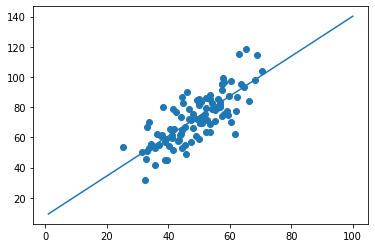

error = 110.25738346621313


In [11]:
def run_least_square_method():
    # 获取文件中的数据
    points = np.genfromtxt('data.csv', delimiter=',')
    # 求出直线的 w 和 b 值
    b, w = least_square_method(points)
    # 画图 x 点随机生成
    x = np.linspace(1, 100, 100)
    # 根据 x w b 求出 y
    y = x * w + b
    # 画数据点
    plt.scatter(points[:, 0], points[:, 1])
    # 划线
    plt.plot(x, y)
    plt.show()
    # 通过最小二乘法求出来的误差
    error = compute_error_for_line_given_points(b, w, points)
    print('error = {0}'.format(error))
run_least_square_method()

$$
w^{'}=w-lr*\frac{\partial{loss}}{\partial{w}} \\
\frac{\partial{loss}}{\partial{w}}=2*\sum_{i}{(w*x_i+b-y_i)*x_i} \\
b^{'}=b-lr*\frac{\partial{loss}}{\partial{b}} \\
\frac{\partial{loss}}{\partial{b}}=2*\sum_{i}{(w*x_i+b-y_i)}
$$

In [12]:
# b_current 当前的 b 值
# w_current 当前的 w 值
# points 数据 
# learningRate 学习率
def step_gradient(b_current, w_current, points, learningRate):
    # b 的梯度，也就是 b 导数值
    b_gradient = 0
    # w 的梯度，也就是 w 导数值
    w_gradient = 0
    # 数据长度
    N = float(len(points))
    # 上面公式中累加的过程
    for i in range(0, len(points)):
        # 取出 x 值
        x = points[i, 0]
        # 取出 y 值
        y = points[i, 1]
        # 由求导之后的公式变成的式子
        b_gradient += (2/N) * ((w_current * x + b_current) - y)
        w_gradient += (2/N) * x * ((w_current * x + b_current) - y)
    # 式子整合求出经过梯度下降的 b
    new_b = b_current - (learningRate * b_gradient)
    new_w = w_current - (learningRate * w_gradient)
    return [new_b, new_w]

In [13]:
# 控制梯度下降算法迭代次数
# points 数据
# starting_b 初始化b
# starting_w 初始化w
# learning_rate 学习率
# num_iterations 迭代次数
def gradient_descent_runner(points, starting_b, starting_w, learning_rate, num_iterations):
    b = starting_b
    w = starting_w
    # 迭代
    for i in range(num_iterations):
        # 没迭代一次就调用一次梯度下降算法
        b, w = step_gradient(b, w, np.array(points), learning_rate)
    return [b, w]

b = 0, w = 0, error = 5565.107834483211


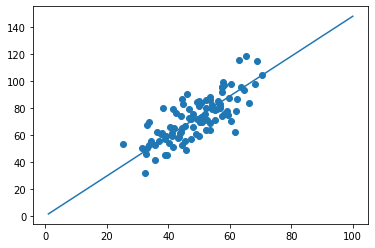

b = 0.08893651993741346, w = 1.4777440851894448, error = 112.61481011613473


In [14]:
def step_gradient_run():
    # 获取数据
    points = np.genfromtxt("data.csv", delimiter=",")
    # 初始化学习率
    learning_rate = 0.0001
    # 初始化 b 和 w
    initial_b = 0
    initial_w = 0
    # 初始化迭代次数
    num_iterations = 1000
    print("b = {0}, w = {1}, error = {2}"
          .format(initial_b, initial_w, compute_error_for_line_given_points(initial_b, initial_w, points)))
    [b, w] = gradient_descent_runner(points, initial_b, initial_w, learning_rate, num_iterations)
    # 画图 x 点随机生成
    x = np.linspace(1, 100, 100)
    # 根据 x w b 求出 y
    y = x * w + b
    # 画数据点
    plt.scatter(points[:, 0], points[:, 1])
    # 划线
    plt.plot(x, y)
    plt.show()
    print("b = {0}, w = {1}, error = {2}"
          .format(b, w, compute_error_for_line_given_points(b, w, points)))
step_gradient_run()

Text(0.5, 0, 'LOSS')

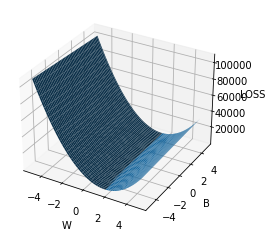

In [15]:
# 当前数据下损失函数的图像
import matplotlib.pyplot as plt
import numpy as np

points = np.genfromtxt('./data.csv', delimiter=',')

w = np.linspace(-5, 5, 100)
b = np.linspace(-5, 5, 100)
W, B = np.meshgrid(w, b)

def f(W, B):
    Loss = 0 
    for k in range(0, len(points)):
        Loss += (W * points[k, 0] + B - points[k, 1]) ** 2
    return Loss / float(len(points))

Loss = f(W, B)

ax = plt.axes(projection='3d')
ax.plot_surface(W, B, Loss)
ax.set_xlabel('W')
ax.set_ylabel('B')
ax.set_zlabel('LOSS')